In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler



In [3]:
churn_df = pd.read_csv(r"C:\Users\HP\Downloads\archive (4)\Churn_Modelling.csv")

In [4]:
churn_df = churn_df.copy()
churn_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
churn_df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
churn_df["CustomerId"].nunique()

10000

In [7]:
null_values = churn_df.isnull().sum().sum()
print(f"Number of Null values : {null_values}")

Number of Null values : 0


In [8]:
churn_df.drop(columns=["RowNumber","CustomerId","Surname"],inplace = True)

In [9]:
list(churn_df.columns)

['CreditScore',
 'Geography',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

In [10]:
churn_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
churn_df["Tenure"].value_counts().values

array([1048, 1035, 1028, 1025, 1012, 1009,  989,  984,  967,  490,  413],
      dtype=int64)

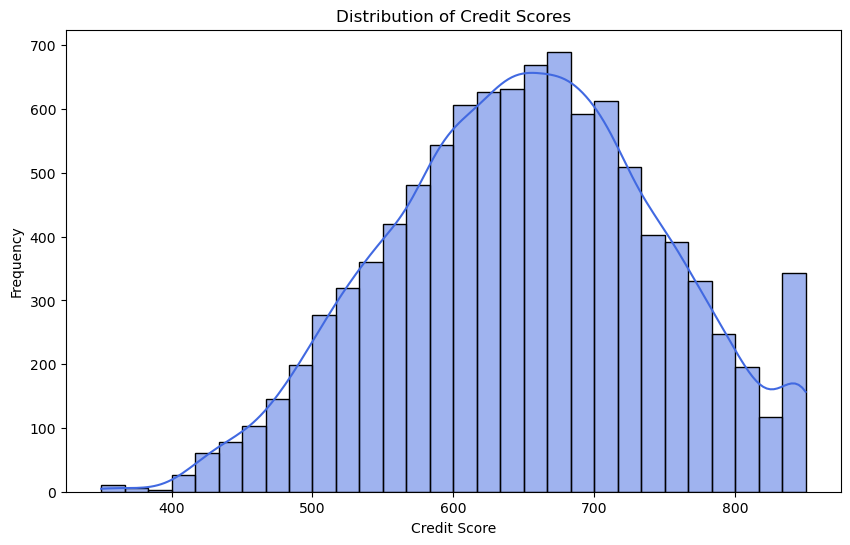

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(churn_df['CreditScore'], bins=30, kde=True, color='royalblue')
plt.title('Distribution of Credit Scores')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.show()

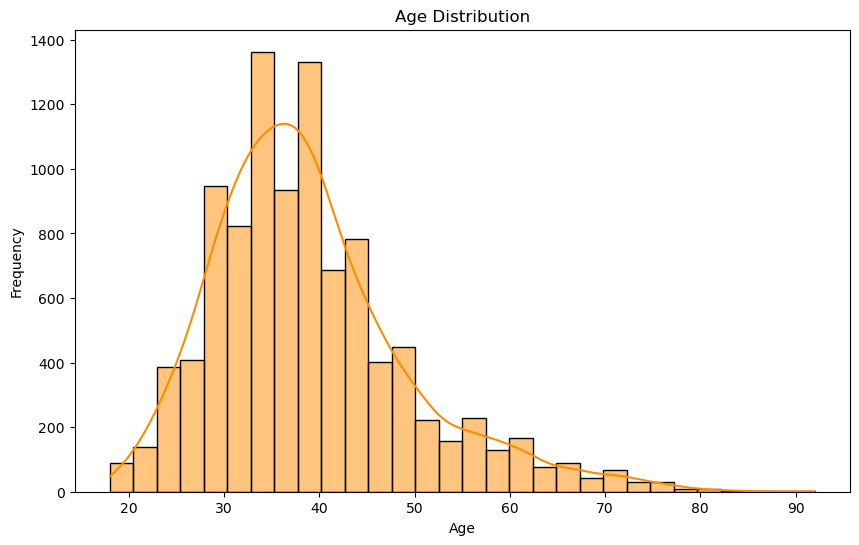

In [13]:
plt.figure(figsize=(10,6))
sns.histplot(data = churn_df,x="Age",kde = True,bins = 30,color = "darkorange")
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

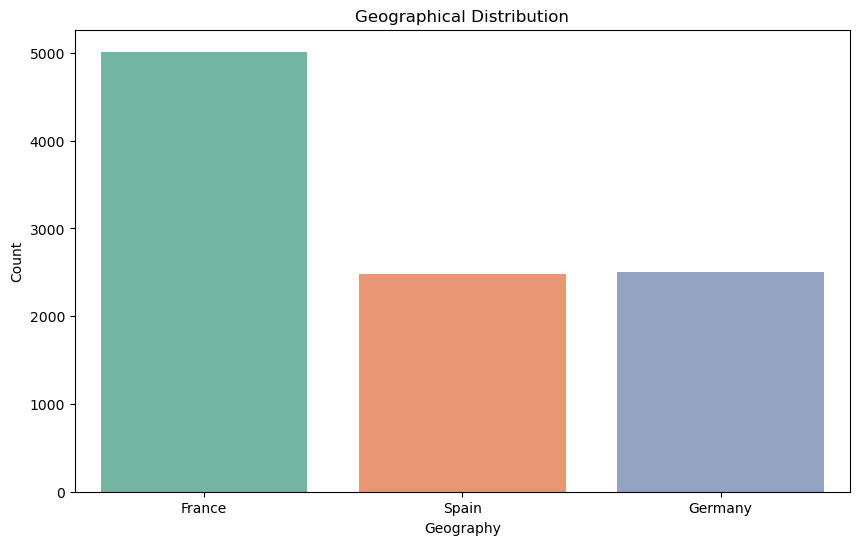

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(data=churn_df, x='Geography', palette='Set2')
plt.title('Geographical Distribution')
plt.xlabel('Geography')
plt.ylabel('Count')
plt.show()


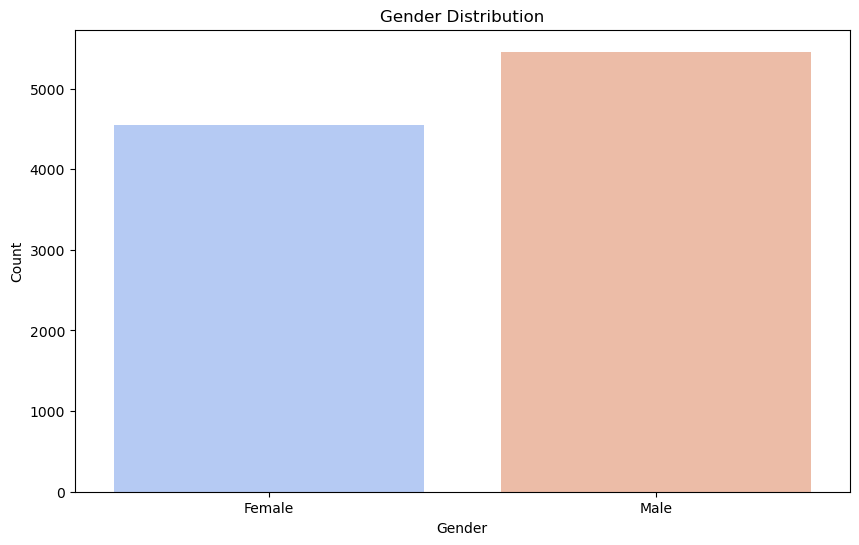

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(data=churn_df, x='Gender', palette='coolwarm')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

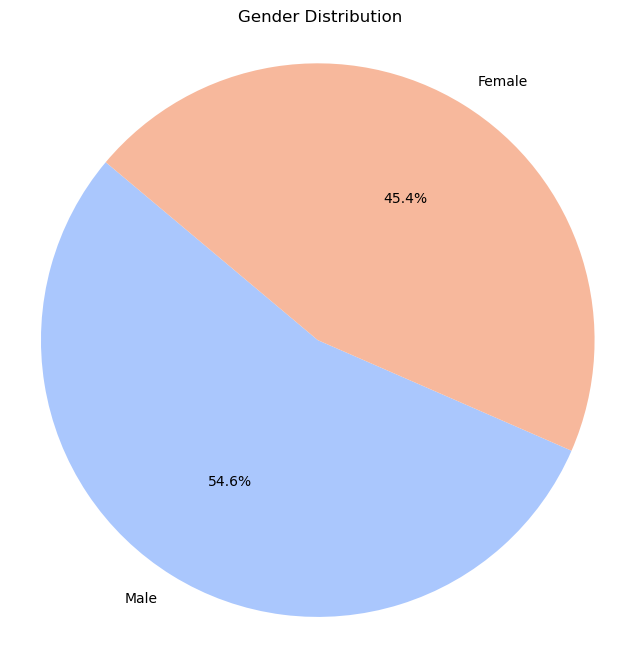

In [16]:
gender_counts = churn_df['Gender'].value_counts()
labels = gender_counts.index
sizes = gender_counts.values

colors = sns.color_palette('coolwarm', len(labels))

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

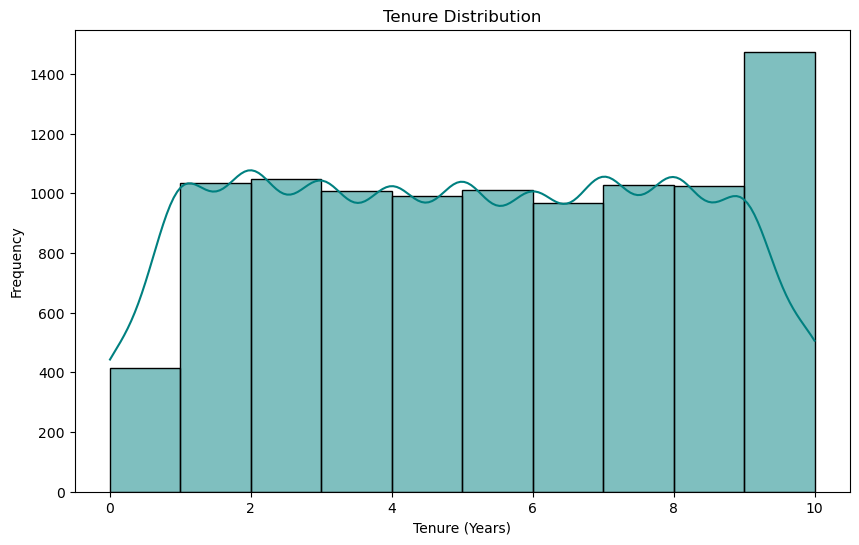

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(churn_df['Tenure'], bins=10, kde=True, color='teal')
plt.title('Tenure Distribution')
plt.xlabel('Tenure (Years)')
plt.ylabel('Frequency')
plt.show()

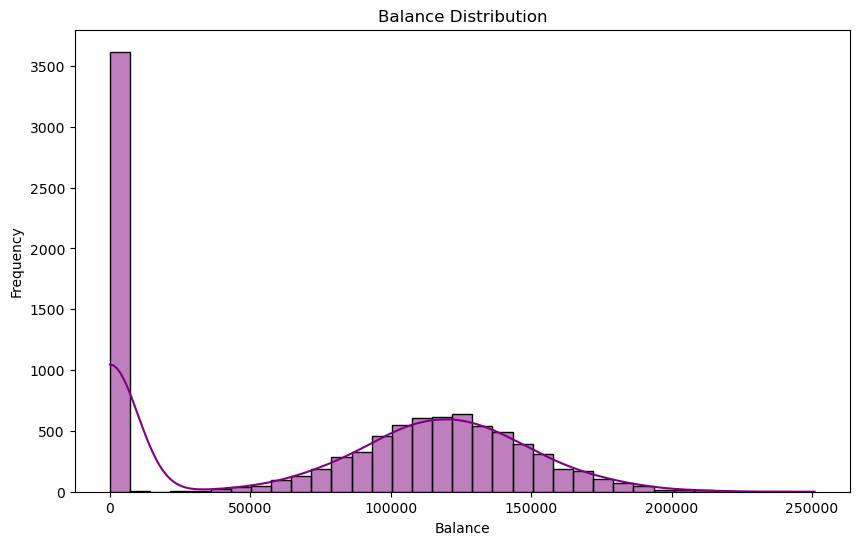

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(churn_df['Balance'], bins=35, kde=True, color='purple')
plt.title('Balance Distribution')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.show()

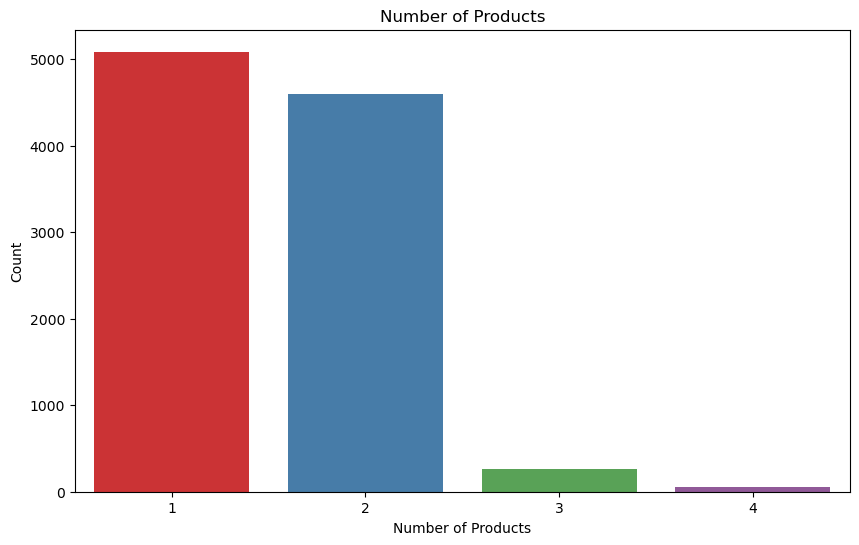

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(data=churn_df, x='NumOfProducts', palette='Set1')
plt.title('Number of Products')
plt.xlabel('Number of Products')
plt.ylabel('Count')
plt.show()

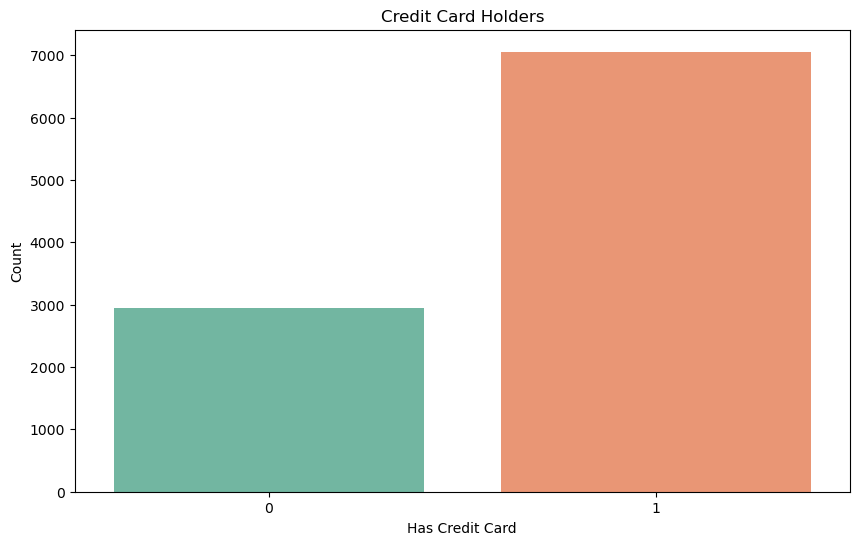

In [20]:
plt.figure(figsize=(10, 6))
sns.countplot(data=churn_df, x='HasCrCard', palette='Set2')
plt.title('Credit Card Holders')
plt.xlabel('Has Credit Card')
plt.ylabel('Count')
plt.show()


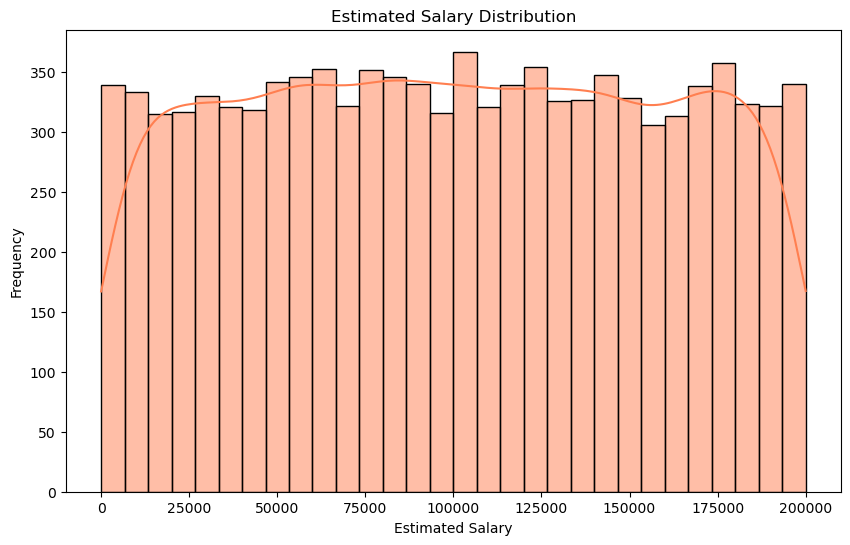

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(churn_df['EstimatedSalary'], bins=30, kde=True, color='coral')
plt.title('Estimated Salary Distribution')
plt.xlabel('Estimated Salary')
plt.ylabel('Frequency')
plt.show()

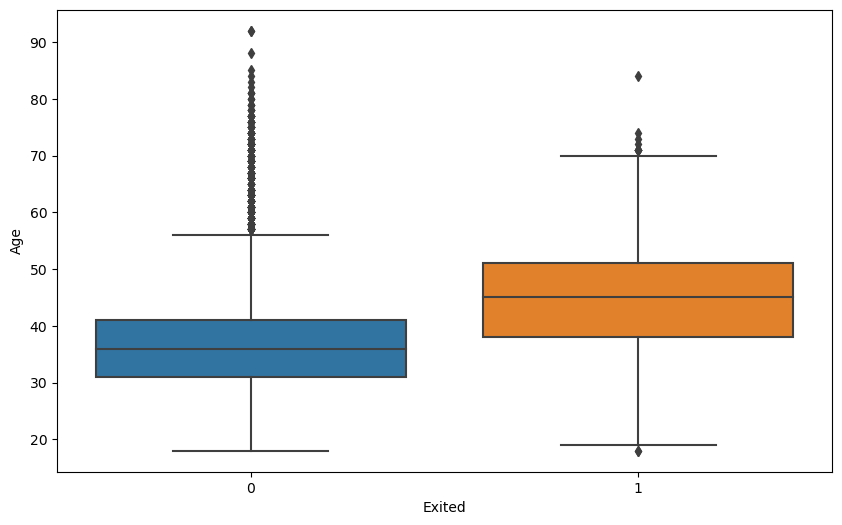

In [22]:
plt.figure(figsize=(10,6))
sns.boxplot(data=churn_df,x='Exited',y='Age')
plt.show()

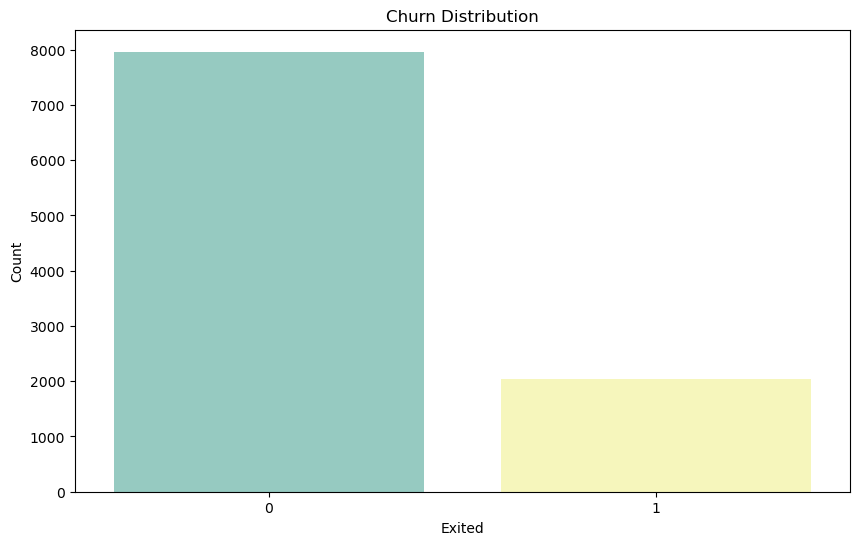

In [23]:
plt.figure(figsize=(10, 6))
sns.countplot(data=churn_df, x='Exited', palette='Set3')
plt.title('Churn Distribution')
plt.xlabel('Exited')
plt.ylabel('Count')
plt.show()


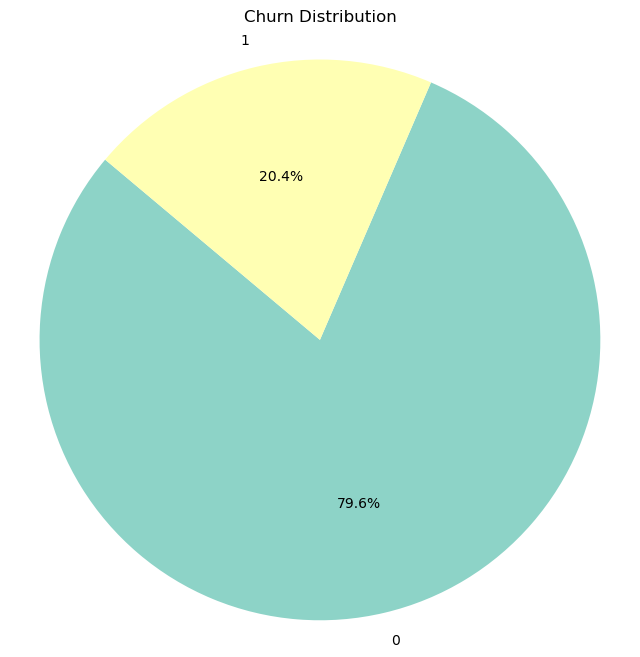

In [24]:
churn_counts = churn_df['Exited'].value_counts()
labels = churn_counts.index
sizes = churn_counts.values

colors = sns.color_palette('Set3', len(labels))

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Churn Distribution')
plt.axis('equal')
plt.show()

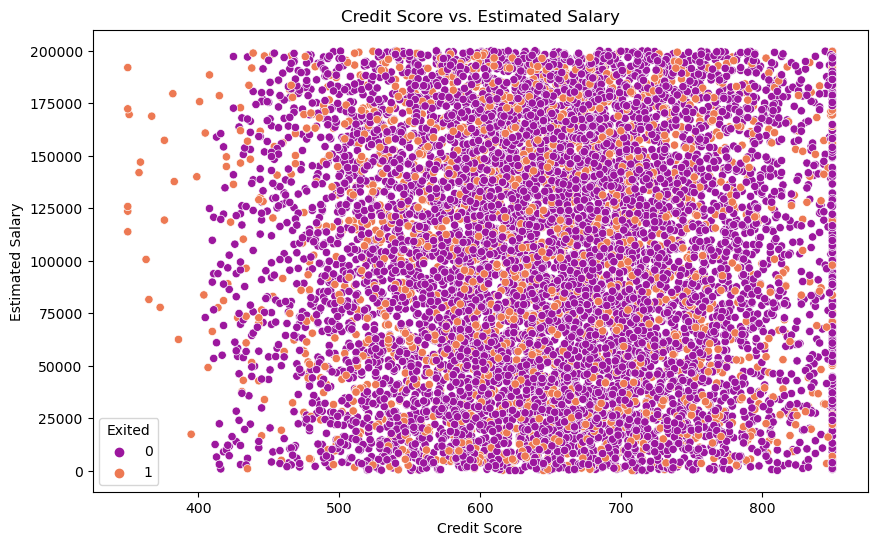

In [38]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=churn_df, x='CreditScore', y='EstimatedSalary', hue='Exited', palette='plasma')
plt.title('Credit Score vs. Estimated Salary')
plt.xlabel('Credit Score')
plt.ylabel('Estimated Salary')
plt.show()


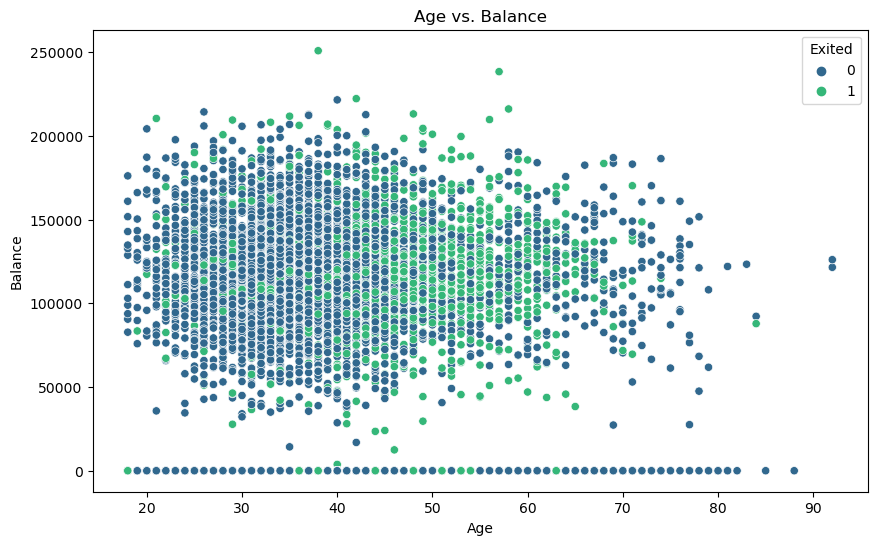

In [39]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=churn_df, x='Age', y='Balance', hue='Exited', palette='viridis')
plt.title('Age vs. Balance')
plt.xlabel('Age')
plt.ylabel('Balance')
plt.show()

In [40]:
model_DTC = DecisionTreeClassifier(random_state = 42,max_depth=7,max_leaf_nodes=30).fit(X_train,train_target)
train_preds_dtc = model_DTC.score(X_train,train_target)
val_preds_dtc = model_DTC.score(X_val,val_target)
test_preds_dtc = model_DTC.score(X_test,test_target)
print(f"Train Accuracy : {train_preds_dtc}")
print(f"Val Accuracy : {val_preds_dtc}")
print(f"Test Accuracy : {test_preds_dtc}")

NameError: name 'X_train' is not defined

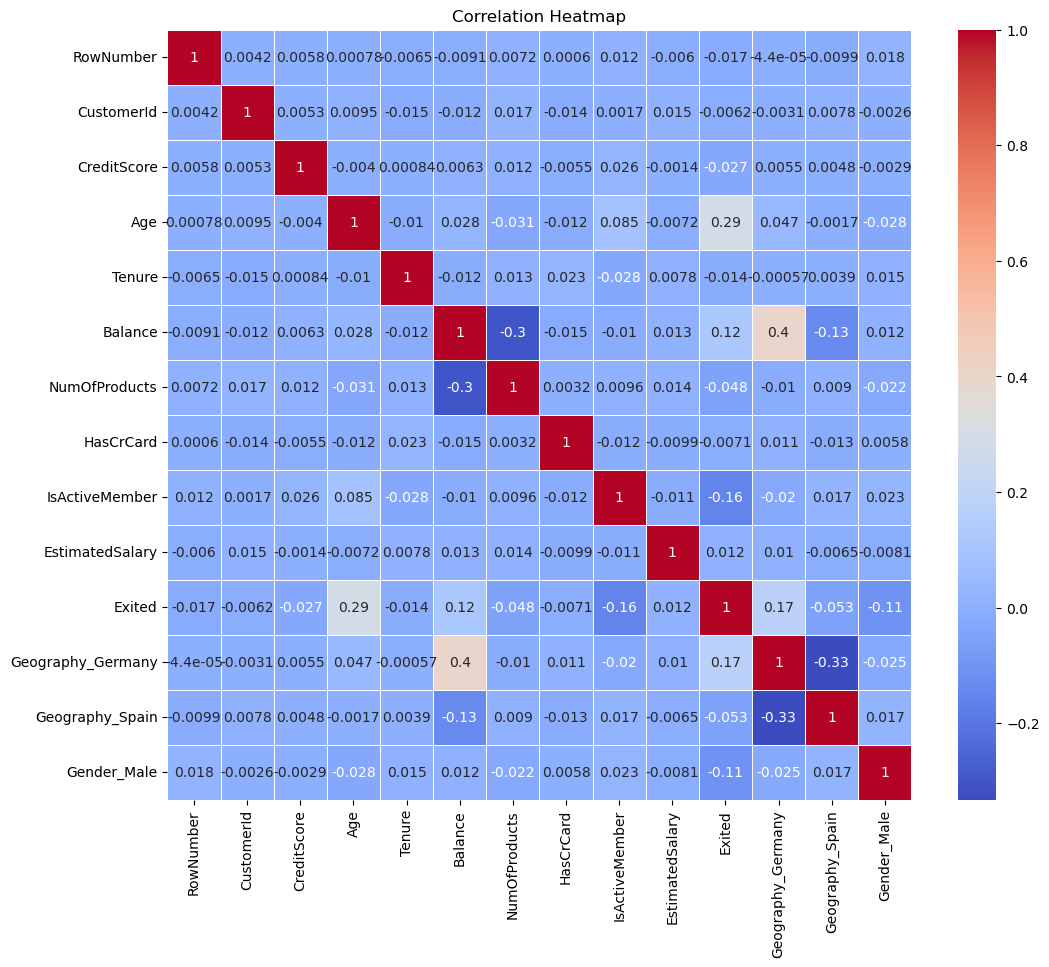

In [41]:
churn_encoded_df = pd.get_dummies(churn_df, columns=['Geography', 'Gender'], drop_first=True)

# Create the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(churn_encoded_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [42]:
churn_df = pd.get_dummies(churn_df, columns=['Geography'],dtype=int,drop_first=True)
input_col = ['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Geography_Germany','Geography_Spain']
target_col = "Exited"
input_col

['CreditScore',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Geography_Germany',
 'Geography_Spain']

In [43]:
churn_df["Gender"] = churn_df["Gender"].map({"Male": 1, "Female": 0}) 
churn_train_df, churn_test = train_test_split(churn_df,test_size = 0.2,random_state=42)
churn_train , churn_val = train_test_split(churn_train_df,test_size=0.25,random_state=42)
len(churn_train) , len(churn_test) , len(churn_val)

(6000, 2000, 2000)

In [44]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   RowNumber          10000 non-null  int64  
 1   CustomerId         10000 non-null  int64  
 2   Surname            10000 non-null  object 
 3   CreditScore        10000 non-null  int64  
 4   Gender             10000 non-null  int64  
 5   Age                10000 non-null  int64  
 6   Tenure             10000 non-null  int64  
 7   Balance            10000 non-null  float64
 8   NumOfProducts      10000 non-null  int64  
 9   HasCrCard          10000 non-null  int64  
 10  IsActiveMember     10000 non-null  int64  
 11  EstimatedSalary    10000 non-null  float64
 12  Exited             10000 non-null  int64  
 13  Geography_Germany  10000 non-null  int32  
 14  Geography_Spain    10000 non-null  int32  
dtypes: float64(2), int32(2), int64(10), object(1)
memory usage: 1.1+ MB


In [45]:
train_input = churn_train[input_col].copy()
train_target = churn_train[target_col].copy()
test_input = churn_test[input_col].copy()
test_target = churn_test[target_col].copy()
val_input = churn_val[input_col].copy()
val_target = churn_val[target_col].copy()

In [46]:
train_input.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 8588 to 6090
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        6000 non-null   int64  
 1   Gender             6000 non-null   int64  
 2   Age                6000 non-null   int64  
 3   Tenure             6000 non-null   int64  
 4   Balance            6000 non-null   float64
 5   NumOfProducts      6000 non-null   int64  
 6   HasCrCard          6000 non-null   int64  
 7   IsActiveMember     6000 non-null   int64  
 8   EstimatedSalary    6000 non-null   float64
 9   Geography_Germany  6000 non-null   int32  
 10  Geography_Spain    6000 non-null   int32  
dtypes: float64(2), int32(2), int64(7)
memory usage: 515.6 KB


In [47]:
list(churn_df.columns)

['RowNumber',
 'CustomerId',
 'Surname',
 'CreditScore',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited',
 'Geography_Germany',
 'Geography_Spain']

In [48]:
train_input.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 8588 to 6090
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        6000 non-null   int64  
 1   Gender             6000 non-null   int64  
 2   Age                6000 non-null   int64  
 3   Tenure             6000 non-null   int64  
 4   Balance            6000 non-null   float64
 5   NumOfProducts      6000 non-null   int64  
 6   HasCrCard          6000 non-null   int64  
 7   IsActiveMember     6000 non-null   int64  
 8   EstimatedSalary    6000 non-null   float64
 9   Geography_Germany  6000 non-null   int32  
 10  Geography_Spain    6000 non-null   int32  
dtypes: float64(2), int32(2), int64(7)
memory usage: 515.6 KB


In [49]:
numeric_cols = ['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Gender']
categorical_col = ['Geography_Germany','Geography_Spain']
scaler = StandardScaler()
scaler.fit(train_input[numeric_cols])

StandardScaler()

In [50]:
train_input[numeric_cols] = scaler.transform(train_input[numeric_cols])
test_input[numeric_cols] = scaler.transform(test_input[numeric_cols])
val_input[numeric_cols] = scaler.transform(val_input[numeric_cols])
X_train = train_input[numeric_cols+categorical_col]
X_val = val_input[numeric_cols+categorical_col]
X_test = test_input[numeric_cols+categorical_col]

In [51]:
model_DTC = DecisionTreeClassifier(random_state = 42,max_depth=7,max_leaf_nodes=30).fit(X_train,train_target)
train_preds_dtc = model_DTC.score(X_train,train_target)
val_preds_dtc = model_DTC.score(X_val,val_target)
test_preds_dtc = model_DTC.score(X_test,test_target)
print(f"Train Accuracy : {train_preds_dtc}")
print(f"Val Accuracy : {val_preds_dtc}")
print(f"Test Accuracy : {test_preds_dtc}")

Train Accuracy : 0.8671666666666666
Val Accuracy : 0.855
Test Accuracy : 0.8625


In [52]:
model_rfc = RandomForestClassifier(n_jobs=-1,random_state=42,max_depth=10,max_leaf_nodes= 80,n_estimators = 30).fit(X_train,train_target)
train_preds_rfc = model_rfc.score(X_train,train_target)
val_preds_rfc = model_rfc.score(X_val,val_target)
test_preds_rfc = model_rfc.score(X_test,test_target)
print(f"Train Accuracy : {train_preds_rfc}")
print(f"Val Accuracy : {val_preds_rfc}")
print(f"Test Accuracy : {test_preds_rfc}")

Train Accuracy : 0.8803333333333333
Val Accuracy : 0.864
Test Accuracy : 0.8605


In [53]:
model_xgbc = XGBClassifier(n_jobs=-1,random_state=42).fit(X_train,train_target)
train_preds_xgbc = model_xgbc.score(X_train,train_target)
val_preds_xgbc = model_xgbc.score(X_val,val_target)
test_preds_xgbc = model_xgbc.score(X_test,test_target)
print(f"Train Accuracy : {train_preds_xgbc}")
print(f"Val Accuracy : {val_preds_xgbc}")
print(f"Test Accuracy : {test_preds_xgbc}")

Train Accuracy : 0.9696666666666667
Val Accuracy : 0.8465
Test Accuracy : 0.8615
